# Multiple Regression Model Assignment

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. </br>


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know: 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [2]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Read the data
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.shape

(730, 16)

In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Cleaning
- Droppping columns which are insignificant:
    - instant: Since this is like an index to each record, we will not be using it in our model. We can drop this column.
    - dteday: This is also like an index, since it is storing the record for each day. We can drop this column.
    - casual and registered : These two columns are summed and stored as cnt. Also, thiese features will be not avaible at the start of a day. So, we can drop them.
    - holiday: This column is simiar to workingday where 1 defines a working day and 0 as holiday. We can drop one of the columns. I chose to drop holiday column.  
- Renaming column names so that they become more readable
    - season as 'Season'
    - yr as 'Year'
    - mnth as 'Month'
    - weekday as 'Weekday'
    - workingday as 'WorkingDay'
    - weathersit as 'WeatherSituation'
    - temp and atemp as 'Temp' and 'ApparentTemp'
    - hum as 'humidity'
    - windspeed as 'Windspeed'
    - cnt as 'Count'
- Converting Categorical variables having string value, so that they become more meaningful/expressive.
    - Season: 1:spring, 2:summer, 3:fall, 4:winter
    - Year: 0:2018 and 1:2019
    - Month: 1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
    - Weekday: 0:'Monday',1:'Tueday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'
    - WorkingDay: 0: Holiday, 1: Working 
    - weathersit: 1: Clear, 2: Mist 3: Light Snow, 4: Heavy Rain
  

In [5]:
# dropping columns
bike_data.drop(['instant', 'dteday', 'casual','registered','holiday'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# Renaming Columns
bike_data.rename({'season':'Season','yr':'Year', 'mnth':'Month','weekday':'Weekday',
                  'workingday':'WorkingDay', 'weathersit':'WeatherSituation', 'temp':'Temp',
                  'atemp':'ApparentTemp', 'hum':'Humidity','windspeed':'Windspeed','cnt':'Count'},axis=1,inplace=True)
bike_data.head()

,Season,Year,Month,Weekday,WorkingDay,WeatherSituation,Temp,ApparentTemp,Humidity,Windspeed,Count
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Converting season into string categorical values

bike_data['Season'] = bike_data['Season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

bike_data['Year'] = bike_data['Year'].map({0:'2018',1:'2019'})

bike_data['Month'] = bike_data['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_data['Weekday'] = bike_data['Weekday'].map({0:'Monday',1:'Tueday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

bike_data['WorkingDay'] = bike_data['WorkingDay'].map({0:'Holiday',1:'Working'})

bike_data['WeatherSituation'] = bike_data['WeatherSituation'].map({1:'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
bike_data.head()

,Season,Year,Month,Weekday,WorkingDay,WeatherSituation,Temp,ApparentTemp,Humidity,Windspeed,Count
0,Spring,2018,Jan,Sunday,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,Monday,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,Tueday,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,Wednesday,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,Thursday,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization

In [8]:
?plt.savefig

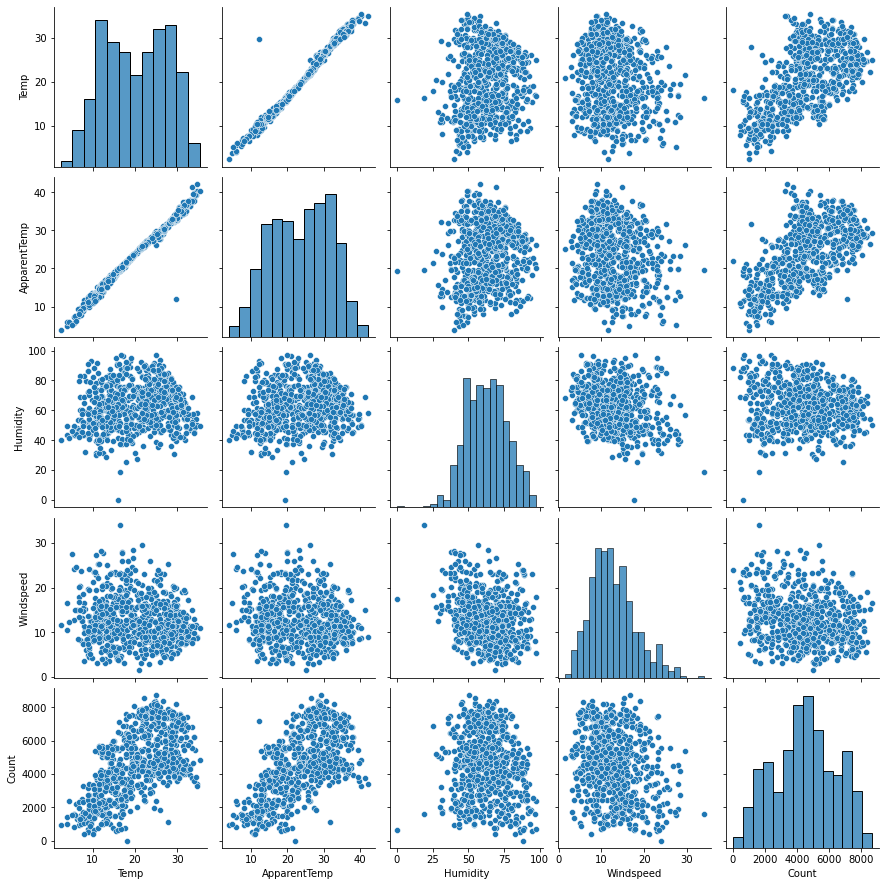

In [9]:
# Visualizing Numerical variables
num_vars= ['Temp','ApparentTemp','Humidity','Windspeed','Count']
sns.pairplot(bike_data, x_vars=num_vars, y_vars=num_vars)
plt.show()

#### Observation:
- Seeing the above maps, it is clear that the Temp and ApparentTemp columns are strongly correlated. 
- There is a linear correlation between Temp and Count. That is, when there is a pleasant weather of around 25-30 degree, people would like to use bike. Whearas when the Temp is low (around 10 degreees) people might not like to ride bike.

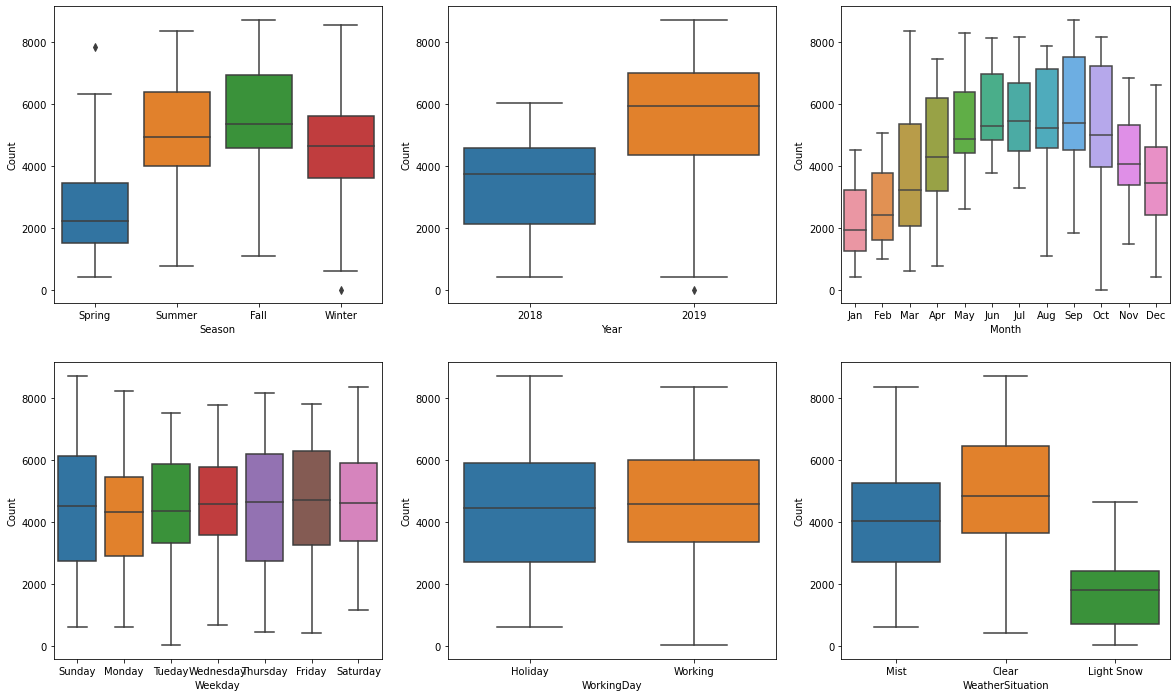

In [10]:
# Visualizing categorical variables:
cat_vars = ['Season','Year','Month','Weekday','WorkingDay','WeatherSituation']
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Year', y = 'Count', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Month', y = 'Count', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'Weekday', y = 'Count', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'WorkingDay', y = 'Count', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'WeatherSituation', y = 'Count', data = bike_data)
plt.show()

#### Observations:
- In summer and fall season, people have rented more bikes. 
- There is definitely an increase in the number of bikes rented in the year 2019 than 2018.
- More bikes are rented in the 9th and 10th month. 
- When the weather sitution is clear sky then, more bikes are used. 

### Data Preparation:
- Dropping Appparent Temp since it is highlyl correlated with Temp
- Encoding: Create dummy variables for all the categorical variables
- Splitting data into train and test


In [11]:
bike_data.drop(['ApparentTemp'],axis=1,inplace=True)

In [12]:
num_vars.remove('ApparentTemp')
num_vars

['Temp', 'Humidity', 'Windspeed', 'Count']

In [13]:
bike_data['Year'] = bike_data['Year'].map({'2018':0,'2019':1})

In [14]:
bike_data['WorkingDay'] = bike_data['WorkingDay'].map({'Holiday':0,'Working':1})

In [15]:
cat_vars.remove('Year')
cat_vars.remove('WorkingDay')

In [16]:
cat_dummy = pd.get_dummies(bike_data[cat_vars],drop_first=True)
cat_dummy

,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tueday,Weekday_Wednesday,WeatherSituation_Light Snow,WeatherSituation_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
bike_data=pd.concat([bike_data,cat_dummy],axis=1)
bike_data.head()

,Season,Year,Month,Weekday,WorkingDay,WeatherSituation,Temp,Humidity,Windspeed,Count,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tueday,Weekday_Wednesday,WeatherSituation_Light Snow,WeatherSituation_Mist
0,Spring,0,Jan,Sunday,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,1
1,Spring,0,Jan,Monday,0,Mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,1
2,Spring,0,Jan,Tueday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,1,0,0,0
3,Spring,0,Jan,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,1,0,0,0,0


In [18]:
bike_data.drop(cat_vars,axis=1,inplace=True)
bike_data.head()

,Year,WorkingDay,Temp,Humidity,Windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Month_Aug,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tueday,Weekday_Wednesday,WeatherSituation_Light Snow,WeatherSituation_Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Dividing the data into Training set and Test set

In [19]:
# Train-Test Split
df_train, df_test = train_test_split(bike_data, train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 28)
(146, 28)


### Rescaling the features
- Applying minMax on numerical variables

In [20]:
## Nomralization:
scaler = MinMaxScaler()


df_train[num_vars] =scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,Temp,Humidity,Windspeed,Count
367,0.113228,0.454701,0.695175,0.254717
648,0.468352,0.477458,0.299450,0.868385
44,0.443431,0.387290,0.807474,0.217556
705,0.326094,0.787463,0.189819,0.573631
379,0.133996,0.431945,0.449210,0.263346


In [21]:
df_train.describe()

,Year,WorkingDay,Temp,Humidity,Windspeed,Count,Season_Spring,Season_Summer,Season_Winter,Month_Aug,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tueday,Weekday_Wednesday,WeatherSituation_Light Snow,WeatherSituation_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.667808,0.537414,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.090753,...,0.092466,0.080479,0.154110,0.123288,0.150685,0.154110,0.148973,0.133562,0.027397,0.342466
std,0.500241,0.471403,0.225336,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.287504,...,0.289931,0.272267,0.361363,0.329049,0.358048,0.361363,0.356367,0.340472,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.736512,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


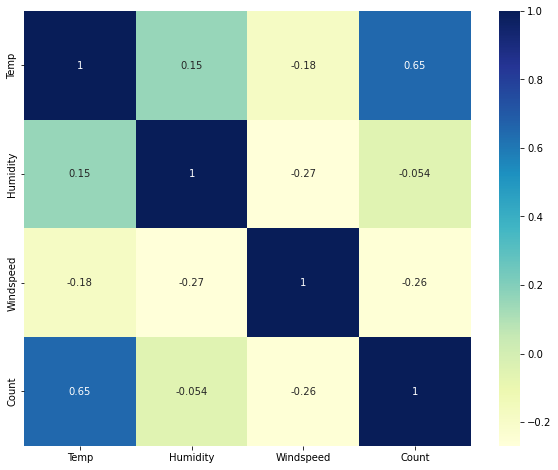

In [22]:
### Visualize the correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_train[num_vars].corr(),annot=True, cmap='YlGnBu')
plt.show()

In [23]:
df_train.columns

Index(['Year', 'WorkingDay', 'Temp', 'Humidity', 'Windspeed', 'Count',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tueday', 'Weekday_Wednesday',
       'WeatherSituation_Light Snow', 'WeatherSituation_Mist'],
      dtype='object')

In [24]:
y_train = df_train.pop('Count')
X_train = df_train

### Building Our Initial Model using RFE
Since, there are 28 features, it will be difficult to choose only few from them. Hence Let's pick top 15 features out of 28 features using automatic feature selection.

In [25]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('WorkingDay', True, 1),
 ('Temp', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', False, 3),
 ('Season_Winter', True, 1),
 ('Month_Aug', False, 8),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 4),
 ('Month_Jan', True, 1),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 10),
 ('Month_Mar', False, 12),
 ('Month_May', False, 7),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 9),
 ('Month_Sep', False, 2),
 ('Weekday_Monday', True, 1),
 ('Weekday_Saturday', False, 11),
 ('Weekday_Sunday', True, 1),
 ('Weekday_Thursday', False, 13),
 ('Weekday_Tueday', False, 5),
 ('Weekday_Wednesday', False, 6),
 ('WeatherSituation_Light Snow', True, 1),
 ('WeatherSituation_Mist', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'WorkingDay', 'Temp', 'Humidity', 'Windspeed', 'Season_Spring',
       'Season_Winter', 'Month_Dec', 'Month_Jan', 'Month_Jul', 'Month_Nov',
       'Weekday_Monday', 'Weekday_Sunday', 'WeatherSituation_Light Snow',
       'WeatherSituation_Mist'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['Season_Summer', 'Month_Aug', 'Month_Feb', 'Month_Jun', 'Month_Mar',
       'Month_May', 'Month_Oct', 'Month_Sep', 'Weekday_Saturday',
       'Weekday_Thursday', 'Weekday_Tueday', 'Weekday_Wednesday'],
      dtype='object')

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 13 Aug 2022   Prob (F-statistic):          2.02e-223
Time:                        07:48:20   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Check VIF

In [30]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,106.62
2,WorkingDay,8.65
12,Weekday_Monday,5.72
13,Weekday_Sunday,5.65
3,Temp,3.56
6,Season_Spring,2.85
7,Season_Winter,2.19
4,Humidity,1.95
11,Month_Nov,1.62
15,WeatherSituation_Mist,1.61


### Observation:
- Weekday_Monday has higher p-value and higher vif so, lets drop it.

In [31]:
X_train_rfe.drop(['Weekday_Monday'],axis=1,inplace=True)
X_train_rfe.columns

Index(['const', 'Year', 'WorkingDay', 'Temp', 'Humidity', 'Windspeed',
       'Season_Spring', 'Season_Winter', 'Month_Dec', 'Month_Jan', 'Month_Jul',
       'Month_Nov', 'Weekday_Sunday', 'WeatherSituation_Light Snow',
       'WeatherSituation_Mist'],
      dtype='object')

In [32]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Sat, 13 Aug 2022   Prob (F-statistic):          6.59e-224
Time:                        07:48:21   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [33]:
# checking vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,71.40
3,Temp,3.55
6,Season_Spring,2.84
7,Season_Winter,2.19
4,Humidity,1.94
14,WeatherSituation_Mist,1.61
9,Month_Jan,1.60
11,Month_Nov,1.60
2,WorkingDay,1.58
12,Weekday_Sunday,1.57


All the features have vif less than 5, p-values are also zero and the r-squared is now 0.850, which is good. This also shows that our model is statistically significant and does not have multicollinear variables (An assumption of linear regression is verified here). 
Lets do the residual analysis.

## Residual Analysis for the training data

In [46]:
y_train_count = lm.predict(X_train_rfe)

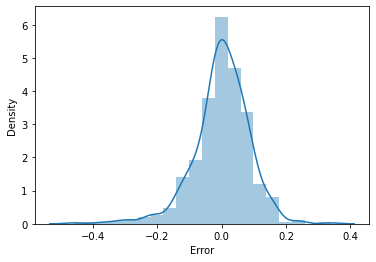

In [53]:
#Plot the histogram of errors
sns.distplot((y_train - y_train_count),bins=20)
plt.xlabel('Error')
plt.savefig('erro_mornalized.jpg')

- Error terms are normally distributed, hence, we can say that our model satisfies assumption of the linear regression. 

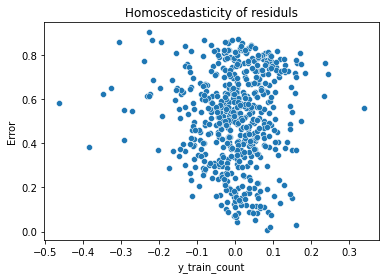

In [64]:
# Plot the error terms w.r.t. y_train_count to check the Homoscedasticity
sns.scatterplot(data="bike_data",x=(y_train - y_train_count),y=y_train_count)
plt.xlabel('y_train_count')
plt.ylabel('Error')
plt.title('Homoscedasticity of residuls')

plt.savefig('homoscedasticity.jpg')
plt.show()

### Making Predictions

In [36]:
num_vars

['Temp', 'Humidity', 'Windspeed', 'Count']

In [37]:
# Applying the scaling on the test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [38]:
# Dividing x_test and y_test
y_test = df_test.pop('Count')
X_test = df_test

In [39]:
X_train_new = X_train_rfe.drop(['const'],axis=1)

In [40]:
X_train_new

,Year,WorkingDay,Temp,Humidity,Windspeed,Season_Spring,Season_Winter,Month_Dec,Month_Jan,Month_Jul,Month_Nov,Weekday_Sunday,WeatherSituation_Light Snow,WeatherSituation_Mist
367,1,1,0.113228,0.454701,0.695175,1,0,0,1,0,0,0,0,0
648,1,1,0.468352,0.477458,0.299450,0,1,0,0,0,0,0,0,0
44,0,1,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0
705,1,1,0.326094,0.787463,0.189819,0,1,1,0,0,0,0,0,1
379,1,0,0.133996,0.431945,0.449210,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,1,0,0,0,1,0,1
79,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,0,0,0,1


In [41]:
# Now lets make predictions
X_test_pred = X_test[X_train_new.columns]

In [42]:

#Add a new constant
X_test_pred = sm.add_constant(X_test_pred)

In [43]:

#Make prediction
y_test_pred = lm.predict(X_test_pred)

### Model Evaluation

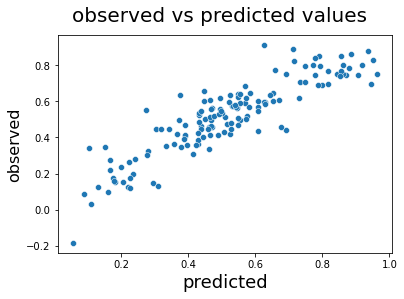

In [62]:
#Plot the histogram of errors
fig = plt.figure()
sns.scatterplot(y_test , y_test_pred)
fig.suptitle('observed vs predicted values', fontsize=20)              # Plot heading 
plt.xlabel('predicted', fontsize=18)                          # X-label
plt.ylabel('observed', fontsize=16) 
plt.savefig('linearity.jpg')

In [45]:
lm.params.sort_values(ascending=False)

Temp                           0.443030
const                          0.311007
Year                           0.228717
Season_Winter                  0.081735
Weekday_Sunday                 0.067761
WorkingDay                     0.057397
Month_Jan                     -0.051350
WeatherSituation_Mist         -0.059787
Month_Dec                     -0.061962
Month_Nov                     -0.072178
Month_Jul                     -0.078277
Season_Spring                 -0.111958
Humidity                      -0.128259
Windspeed                     -0.184658
WeatherSituation_Light Snow   -0.263433
dtype: float64

We can see that the equation of the best fitted line: </br>
$Count = 0.228 \times Year +  0.443 \times Temp + 0.057 \times WorkingDay - 0.128 \times Humidity - 0.184 \times Windspeed
         - 0.111 \times Season\_Spring + .0817 \times Season\_Winter - 0.061 \times Month\_Dec - 0.051 \times Month\_Jan
         - 0.078 \times Month\_Jul - 0.072 \times Month\_Nov + 0.067 \times Weekday\_Sunday - 0.263 \times WeatherSituation\_light Snow - 0.0597 \times WeatherSituation\_Mist $

This model is decent, it can explain the variance in the data points by 85%. The top 5 important features that Count variable is dependent on are:
- Temp
- WeatherSituation_Light snow
- Year
- Windspeed
- Hummidity